In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imshow, imread
from scipy.signal import convolve2d

In [2]:
class_image = cv2.imread("images/class_photo.jpg")
cv2.imshow("class photo", class_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
new_image = class_image[310:580, 363:800, :]
cv2.imshow("class photo", new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(270, 437)


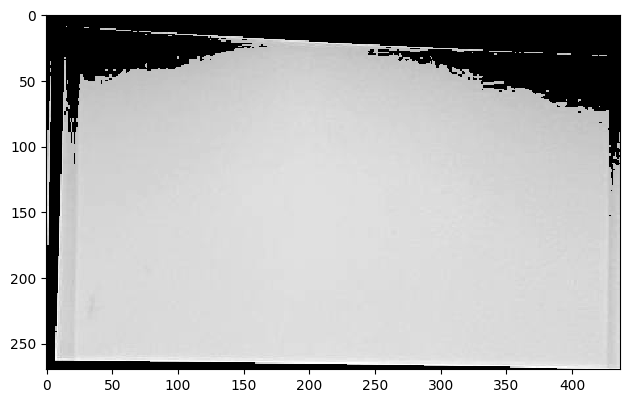

In [13]:
class_image = cv2.imread("images/class_photo.jpg", 0)
new_image = class_image[310:580, 363:800]
for i in range(270):
    for j in range(437):
        if new_image[i][j] <= 190:
            new_image[i][j] = 0
print(new_image.shape)
imshow(new_image)

In [7]:
gaussian = (1 / 16.0) * np.array([[1.0, 2.0, 1.0], [2.0, 4.0, 2.0], [1.0, 2.0, 1.0]])

In [8]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, "same", boundary="fill", fillvalue=0)
    return image

In [9]:
class_image = cv2.imread("images/class_photo.jpg", 0)
print(class_image.shape)

(960, 1280)


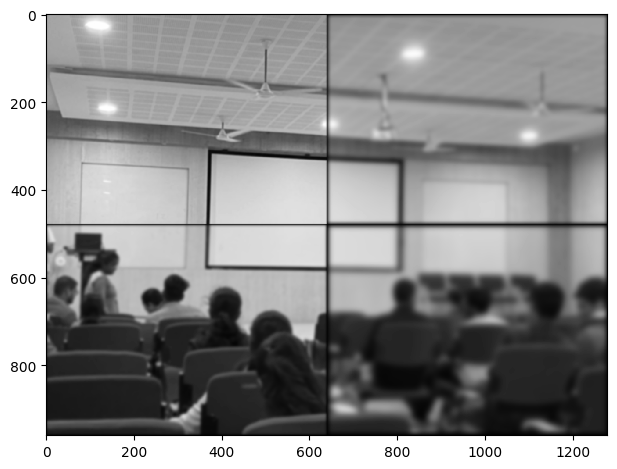

In [10]:
class_image[:480, :640] = multi_convolver(class_image[:480, :640], gaussian, 5)
class_image[480:, :640] = multi_convolver(class_image[480:, :640], gaussian, 20)
class_image[:480, 640:] = multi_convolver(class_image[:480, 640:], gaussian, 50)
class_image[480:, 640:] = multi_convolver(class_image[480:, 640:], gaussian, 100)
imshow(class_image)

(960, 1280, 3)


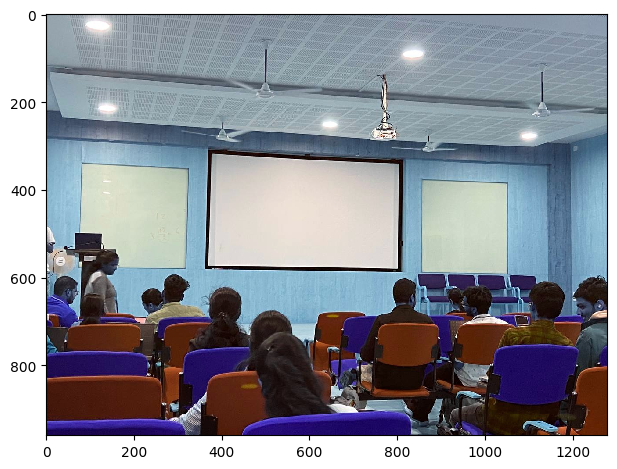

In [20]:
class_image = cv2.imread("images/class_photo.jpg", cv2.COLOR_BGR2RGB)
imshow(class_image)
print(class_image.shape)

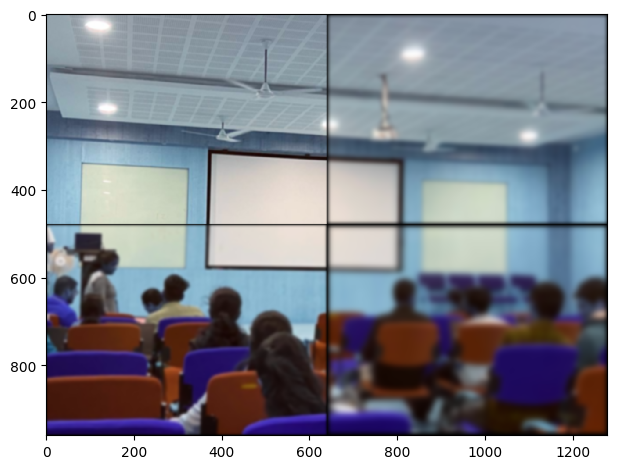

In [19]:
class_image[:480, :640, 0] = multi_convolver(class_image[:480, :640, 0], gaussian, 5)
class_image[:480, :640, 1] = multi_convolver(class_image[:480, :640, 1], gaussian, 5)
class_image[:480, :640, 2] = multi_convolver(class_image[:480, :640, 2], gaussian, 5)
class_image[480:, :640, 0] = multi_convolver(class_image[480:, :640, 0], gaussian, 20)
class_image[480:, :640, 1] = multi_convolver(class_image[480:, :640, 1], gaussian, 20)
class_image[480:, :640, 2] = multi_convolver(class_image[480:, :640, 2], gaussian, 20)
class_image[:480, 640:, 0] = multi_convolver(class_image[:480, 640:, 0], gaussian, 50)
class_image[:480, 640:, 1] = multi_convolver(class_image[:480, 640:, 1], gaussian, 50)
class_image[:480, 640:, 2] = multi_convolver(class_image[:480, 640:, 2], gaussian, 50)
class_image[480:, 640:, 0] = multi_convolver(class_image[480:, 640:, 0], gaussian, 100)
class_image[480:, 640:, 1] = multi_convolver(class_image[480:, 640:, 1], gaussian, 100)
class_image[480:, 640:, 2] = multi_convolver(class_image[480:, 640:, 2], gaussian, 100)
imshow(class_image)